In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [82]:
df = pd.read_csv('Survey2020Responses_DupRemoved.csv')

In [83]:
punctdict = {" ":"_" , "?":"" , "(":"" , ")":"" , "[":"" , "]":"" , "/":"_" , ",":"" , "<":"lessthan" , '"':"" , ".":""}
for col in df.columns:
    entryseries = df[col].astype("str")
    entrylist = list(entryseries)
    entrylist.sort()
    while "nan" in entrylist:
        entrylist.remove("nan")
    entryseries = pd.Series(entrylist)
    filename = col 
    for key in punctdict.keys():
        filename = filename.replace(key,punctdict[key])
    filename+=".csv"
    entryseries.to_csv(filename,index=False)

In [84]:
df['Trainee']=df.eval("`Which of the following roles best describes you?` in ['Undergraduate/Graduate student','Postdoctoral fellow']")

df['Imaging']=df.eval("`How would you describe your work?` <3")
df['Analyst']=df.eval("`How would you describe your work?` >5")
df['Balanced']=df.eval("`How would you describe your work?`in [3,4,5]")

In [95]:
df['Low']=df.eval("`How would you rate your comfort in developing new computational skills?` <3")
df['High']=df.eval("`How would you rate your comfort in developing new computational skills?` >5")
df['Medium']=df.eval("`How would you rate your comfort in developing new computational skills?`in [3,4,5]")

In [96]:
sum(df['Trainee'])

207

In [97]:
sum(df['Imaging']),sum(df['Balanced']),sum(df['Analyst'])

(63, 349, 72)

In [98]:
sum(df['Low']),sum(df['Medium']),sum(df['High'])

(66, 236, 182)

In [99]:
df['WorkerType']=np.zeros(484)
df.loc[df['Imaging'] == True, 'WorkerType'] = 'Imaging'
df.loc[df['Analyst'] == True, 'WorkerType'] = 'Analyst'
df.loc[df['Balanced'] == True, 'WorkerType'] = 'Balanced'

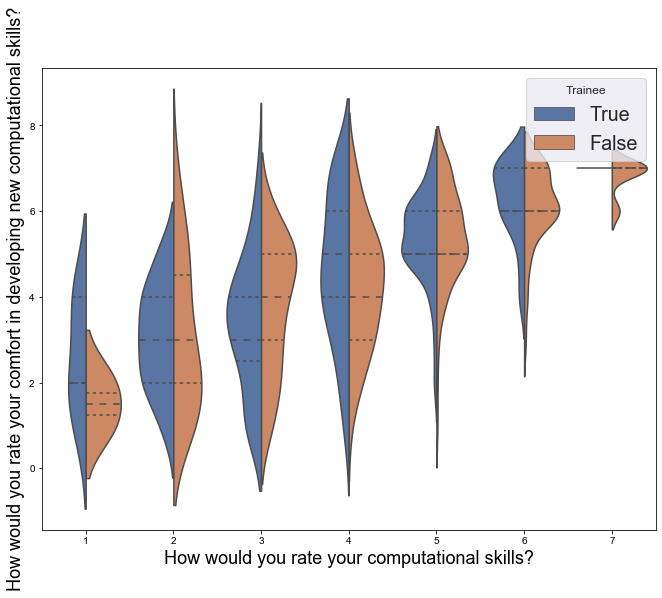

In [12]:
a4_dims = (11, 8.5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 1.8)
sns_plot=sns.violinplot(ax=ax, data=df,x='How would you rate your computational skills?', 
                        y='How would you rate your comfort in developing new computational skills?',
            split=True,inner="quartile",
            hue='Trainee',hue_order=[True,False])
sns_plot.set_xlabel("How would you rate your computational skills?", fontsize = 18)
sns_plot.set_ylabel("How would you rate your comfort in developing new computational skills?", fontsize = 18)
#sns_plot.set_size_inches(3,4)
plt.savefig("TraineeCompSkill.png",bbox_inches='tight',dpi=300)

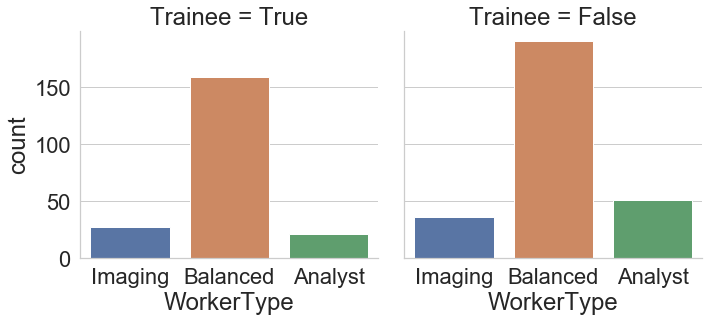

In [13]:
a4_dims = (11, 8.5)
sns.set(font_scale = 2)
sns.set_style("whitegrid")
g = sns.catplot(data=df,kind='count',col="Trainee", col_order=[True,False],
                x='WorkerType',order=['Imaging','Balanced','Analyst'],legend=True)

plt.savefig("TraineeWorkerType.png",bbox_inches='tight',dpi=300)

In [15]:
df['Student']=df.eval("`Which of the following roles best describes you?` == 'Undergraduate/Graduate student'")
df['Postdoc']=df.eval("`Which of the following roles best describes you?` == 'Postdoctoral fellow'")
df['PI']=df.eval("`Which of the following roles best describes you?` == 'Principal investigator'")
df['Image analyst']=df.eval("`Which of the following roles best describes you?` == 'Image analyst'")
df['Facility director']=df.eval("`Which of the following roles best describes you?` == 'Facility director'")
df['Facility staff']=df.eval("`Which of the following roles best describes you?` == 'Facility staff'")
df['Clinician']=df.eval("`Which of the following roles best describes you?` == 'Clinician'")
df['OtherRoles']=df.eval("`Which of the following roles best describes you?` not in ['Undergraduate/Graduate student','Postdoctoral fellow','Principal investigator','Image analyst','Facility director','Facility staff','Clinician']")

In [16]:
sum(df['Student']),sum(df['Postdoc']),sum(df['PI']),sum(df['Image analyst']),sum(df['Facility director']),sum(df['Facility staff']),sum(df['Clinician']),sum(df['OtherRoles'])

(99, 108, 70, 30, 28, 65, 1, 83)

In [17]:
df['Roles']=np.zeros(484)
df.loc[df['Student'] == True, 'Roles'] = 'Student'
df.loc[df['Postdoc'] == True, 'Roles'] = 'Postdoc'
df.loc[df['PI'] == True, 'Roles'] = 'PI'
df.loc[df['Image analyst'] == True, 'Roles'] = 'Image analyst'
df.loc[df['Facility director'] == True, 'Roles'] = 'Facility director'
df.loc[df['Facility staff'] == True, 'Roles'] = 'Facility staff'
df.loc[df['Clinician'] == True, 'Roles'] = 'Clinician'
df.loc[df['OtherRoles'] == True, 'Roles'] = 'OtherRoles'

<Figure size 792x612 with 0 Axes>

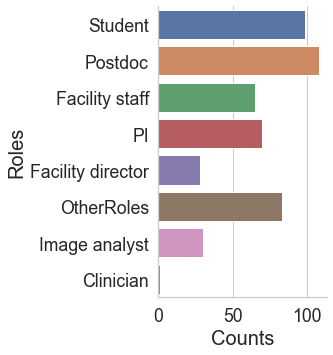

In [18]:
a4_dims = (11, 8.5)
plt.figure(figsize=a4_dims)
sns.set(font_scale = 1.6)
sns.set_style("whitegrid")
chart = sns.catplot(data=df, kind='count', y='Roles')
#chart.set_xticklabels(rotation=90)
chart.set_xlabels("Counts", fontsize = 20)
chart.set_ylabels("Roles", fontsize = 20)
plt.savefig("RolesCounts.png",bbox_inches='tight',dpi=300)

In [19]:
columns = list(df.columns)
interest_level = [x for x in columns if "How interested are you in learning more about the following topics?" in x]
separated = df.melt(value_vars=interest_level, var_name='TopicofInterest', value_name='InterestLevel')
separated['InterestTopic'] = separated['TopicofInterest'].replace({interest_level[0]: 'Image analysis theory',
                                    interest_level[1]: 'General image analysis practices',
                                    interest_level[2]: 'Image analysis practices particular to my field',
                                    interest_level[3]: 'Learning to use a particular software tool',
                                    interest_level[4]: 'Deep learning as applied to image analysis'})

#separated.head()

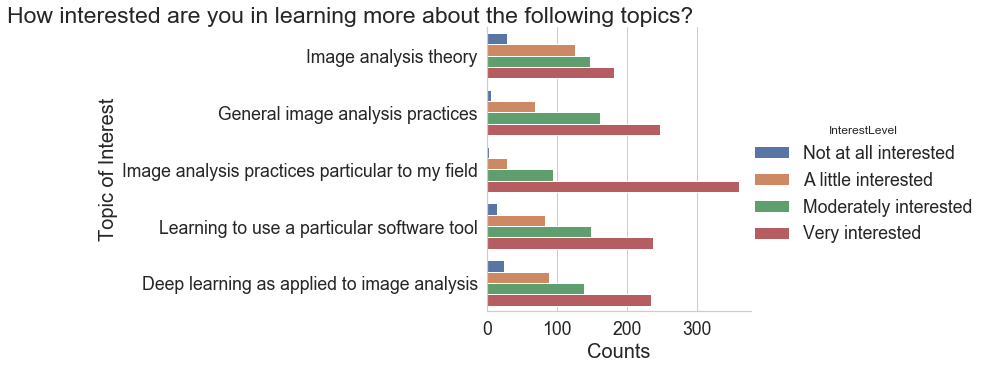

In [31]:
#sns.set(font_scale=1.8)
sns.set_style("whitegrid")

g = sns.catplot(data=separated,kind='count',              
                 y='InterestTopic', 
                 order=['Image analysis theory','General image analysis practices','Image analysis practices particular to my field','Learning to use a particular software tool','Deep learning as applied to image analysis'],
                hue='InterestLevel', hue_order=['Not at all interested','A little interested','Moderately interested','Very interested'],legend=True)

g.set_xlabels("Counts", fontsize = 20)
g.set_ylabels("Topic of Interest", fontsize = 20)
g.fig.suptitle("How interested are you in learning more about the following topics?",horizontalalignment='right')
plt.savefig("TopicofInterest_Learning.png",bbox_inches='tight',dpi=300)
#g.set_xticklabels(["Image analysis theory", "General image analysis practices", "Image analysis practices particular to my field","Learning to use a particular software tool","Deep learning as applied to image analysis"], rotation=45,horizontalalignment='right')   


In [101]:
columns = list(df.columns)
interest_form = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted = df.melt(id_vars=['How would you rate your computational skills?','WorkerType','Trainee'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted['Type'] = melted['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})
#melted.head()

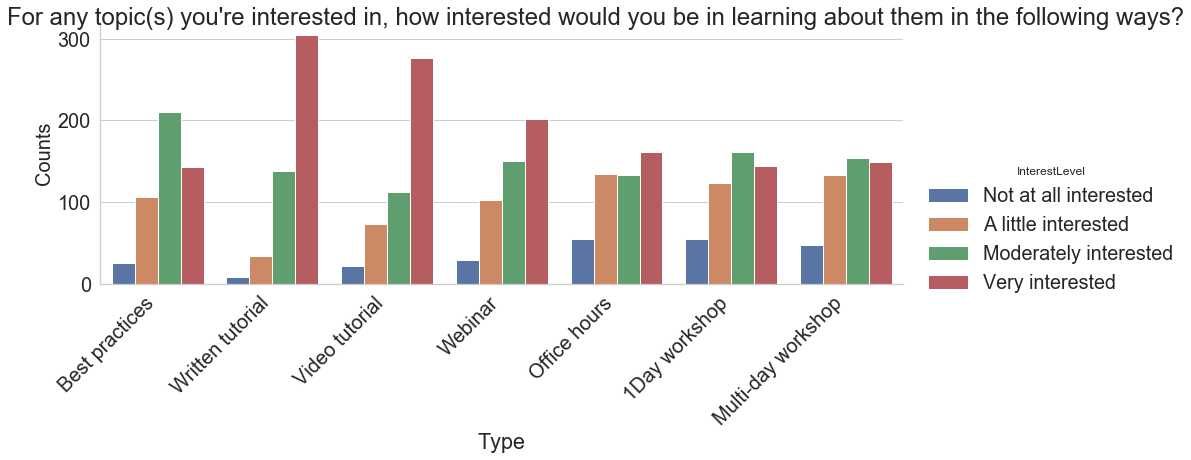

In [61]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
g = sns.catplot(data=melted,kind='count',
                x='Type',
                order=['BestPracticesArticle','WrittenTutorial','VideoTutorial','InteractiveWebinar','OfficeHours','1DayWorkshop','MultiDayWorkshop'],
                hue='InterestLevel',hue_order=['Not at all interested','A little interested','Moderately interested','Very interested'],aspect=2.5)

g.set_xticklabels(["Best practices", "Written tutorial", "Video tutorial","Webinar","Office hours","1Day workshop","Multi-day workshop"],rotation=45,horizontalalignment='right',fontsize=20)
g.set_ylabels("Counts", fontsize = 20)
g.fig.suptitle("For any topic(s) you're interested in, how interested would you be in learning about them in the following ways?", fontsize=24)
plt.savefig("LearningMethos_Interest.png",bbox_inches='tight',dpi=300)

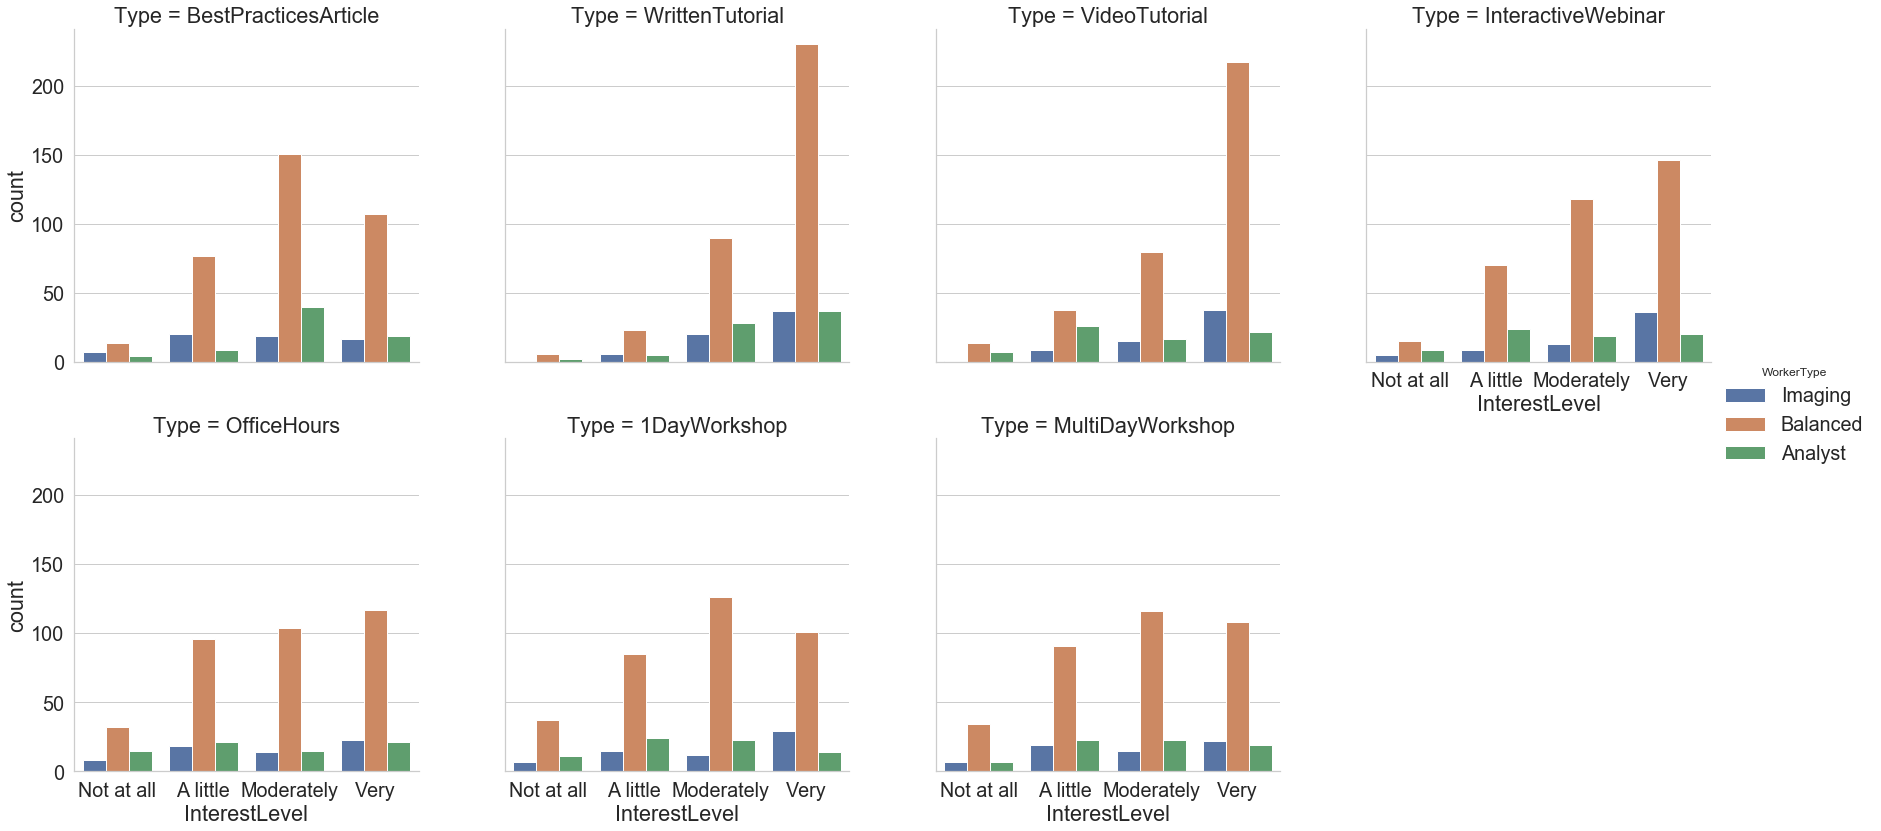

In [62]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
g = sns.catplot(data=melted,kind='count',col='Type',col_wrap=4,
                x='InterestLevel',
                order=['Not at all interested','A little interested','Moderately interested','Very interested'],
                hue='WorkerType',hue_order=['Imaging','Balanced','Analyst'],height=6)
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])
plt.savefig("InterestLearningMaterial.png",bbox_inches='tight',dpi=300)

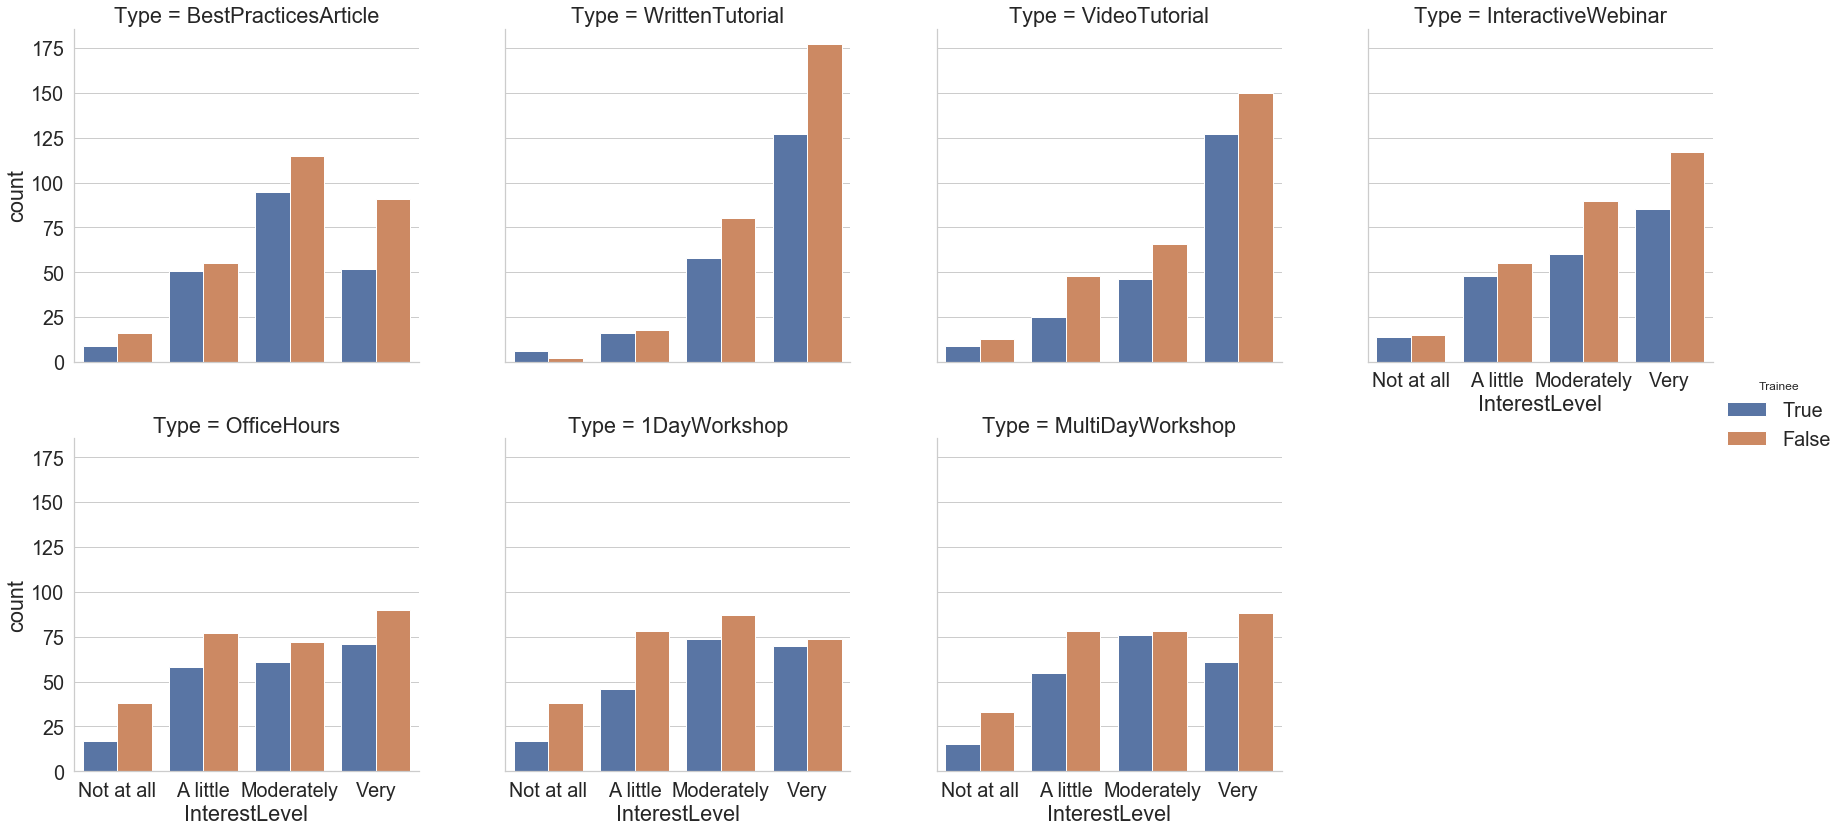

In [63]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
g = sns.catplot(data=melted,kind='count',col='Type',col_wrap=4,
                x='InterestLevel',
                order=['Not at all interested','A little interested','Moderately interested','Very interested'],
                hue='Trainee',hue_order=[True,False],height=6)
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])
plt.savefig("TraineeInterestinLM.png",bbox_inches='tight',dpi=300)

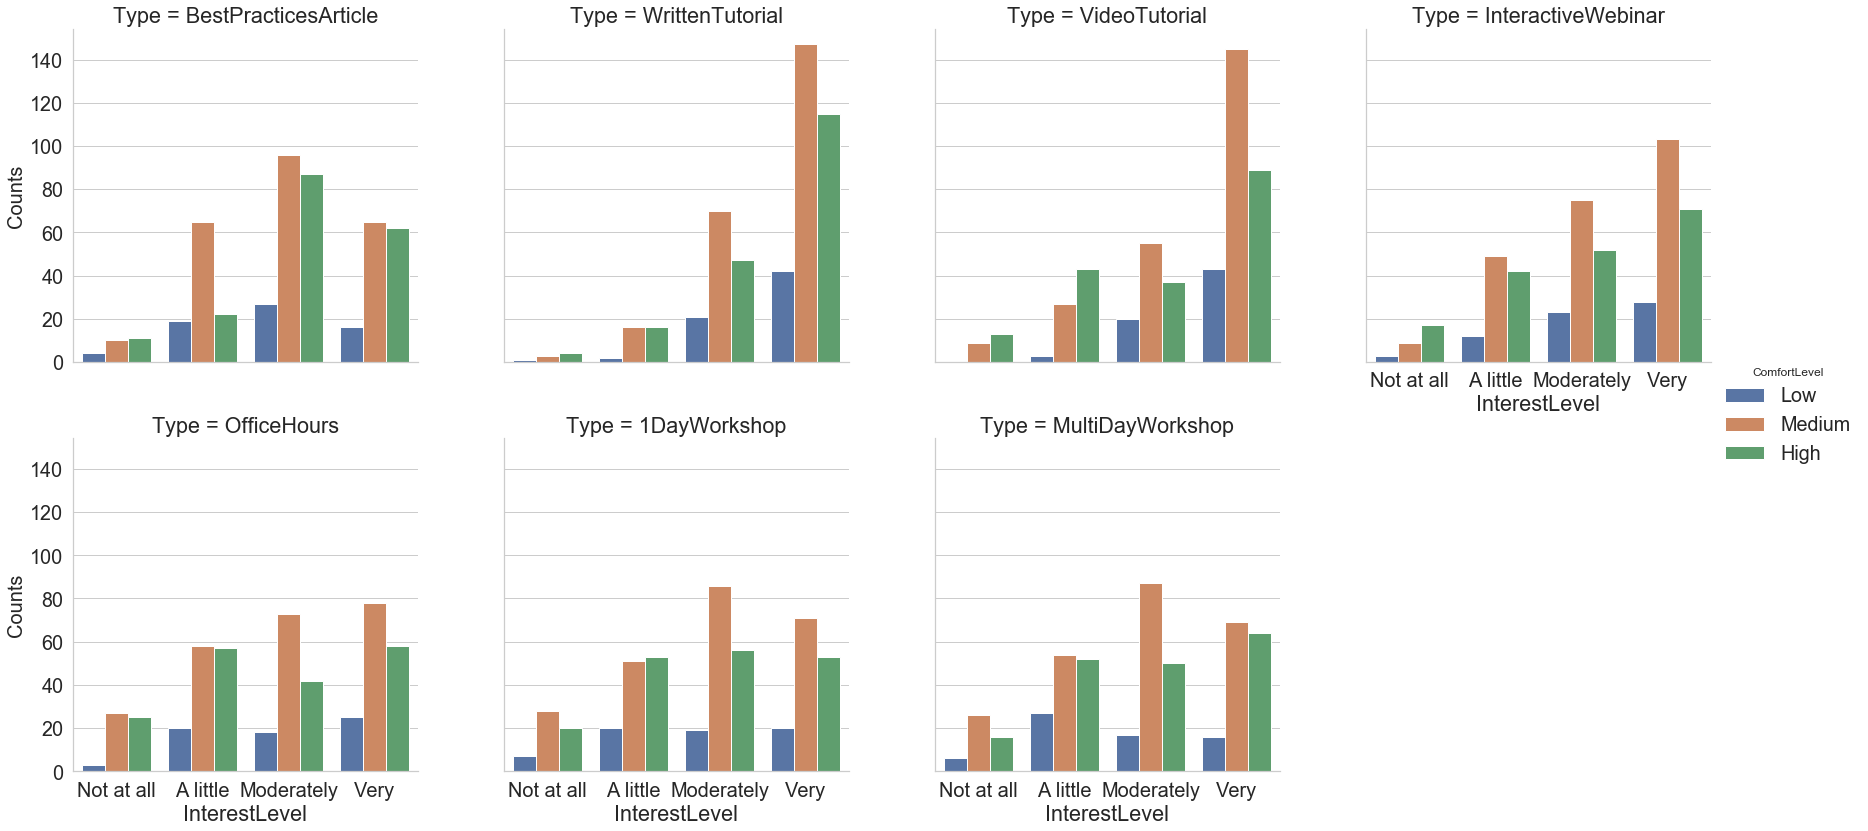

In [115]:
columns = list(df.columns)
interest_form = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted = df.melt(id_vars=['ComfortLevel'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted['Type'] = melted['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})


sns.set(font_scale=1.8)
sns.set_style("whitegrid")
g = sns.catplot(data=melted,kind='count',col='Type',col_wrap=4,
                x='InterestLevel',
                order=['Not at all interested','A little interested','Moderately interested','Very interested'],
                hue='ComfortLevel',hue_order=['Low','Medium','High'],height=6)
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"],fontsize = 20)
g.set_ylabels("Counts", fontsize = 20)
#g.fig.suptitle("Interest in learning based on comfort in developing new computational tools", fontsize=24)
plt.savefig("InterestLearning_Comfort.png",bbox_inches='tight',dpi=300)

In [65]:
interest_list = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted = df.melt(id_vars=['How would you rate your computational skills?','WorkerType','Trainee'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted['Type'] = melted['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})
#melted.head()

In [66]:
df['MicroscopeComSoftware']=df.eval("`What image analysis tools do you use the most?` == 'Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)'")
df['OtherCommercialSoftware']=df.eval("`What image analysis tools do you use the most?` == 'Other commercial software (Imaris, Volocity, etc)'")
df['OpenSourcePoint&Click']=df.eval("`What image analysis tools do you use the most?` == 'Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)'")
df['CompLibrary&Scripts']=df.eval("`What image analysis tools do you use the most?` == 'Computational libraries and scripts (scikit-image, MATLAB, etc)'")
df['None']=df.eval("`What image analysis tools do you use the most?` == 'None'") 
df['OtherSoftware']=df.eval("`What image analysis tools do you use the most?` not in ['Commercial software that comes with my microscope (ie Columbus, Elements, Softworx, etc)','Other commercial software (Imaris, Volocity, etc)','Open source point-and-click software (ImageJ, FIJI, Icy, CellProfiler, etc)','Computational libraries and scripts (scikit-image, MATLAB, etc)']")

In [67]:
sum(df['MicroscopeComSoftware']),sum(df['OtherCommercialSoftware']),sum(df['OpenSourcePoint&Click']),sum(df['CompLibrary&Scripts']),sum(df['None']),sum(df['OtherSoftware'])

(34, 34, 323, 77, 0, 16)

In [68]:
df['Most used software']=np.zeros(484)
df.loc[df['MicroscopeComSoftware'] == True, 'Most used software'] = 'Microscope commercial software'
df.loc[df['OtherCommercialSoftware'] == True, 'Most used software'] = 'Other commercial software'
df.loc[df['OpenSourcePoint&Click'] == True, 'Most used software'] = 'Open-source point & click'
df.loc[df['CompLibrary&Scripts'] == True, 'Most used software'] = 'Computational library & scripts'
df.loc[df['None'] == True, 'Most used software'] = 'None'
df.loc[df['OtherSoftware'] == True, 'Most used software'] = 'Other software'

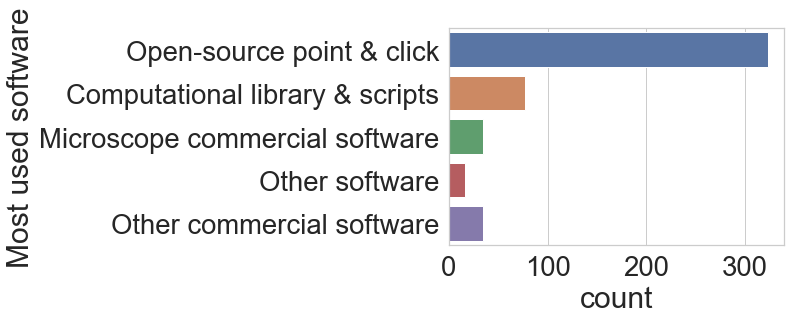

In [69]:
sns.set_style("whitegrid")
chartSoft = sns.countplot(data=df, y='Most used software')
plt.savefig("MostUsedSoftware.png",bbox_inches='tight',dpi=300)
#chartSoft.set_xticklabels(rotation=-15)

In [116]:
print(df.groupby('Imaging').mean()['How would you rate your computational skills?'][True],
      df.groupby('Imaging').std()['How would you rate your computational skills?'][True],
      df.groupby('Balanced').mean()['How would you rate your computational skills?'][True],
      df.groupby('Balanced').std()['How would you rate your computational skills?'][True],
      df.groupby('Analyst').mean()['How would you rate your computational skills?'][True],
      df.groupby('Analyst').std()['How would you rate your computational skills?'][True])

3.5873015873015874 1.4214363548199727 4.163323782234957 1.3149128553929372 5.402777777777778 1.4008018048248747


In [117]:
df['How would you rate your comfort in developing new computational skills?'].mean()

4.725206611570248

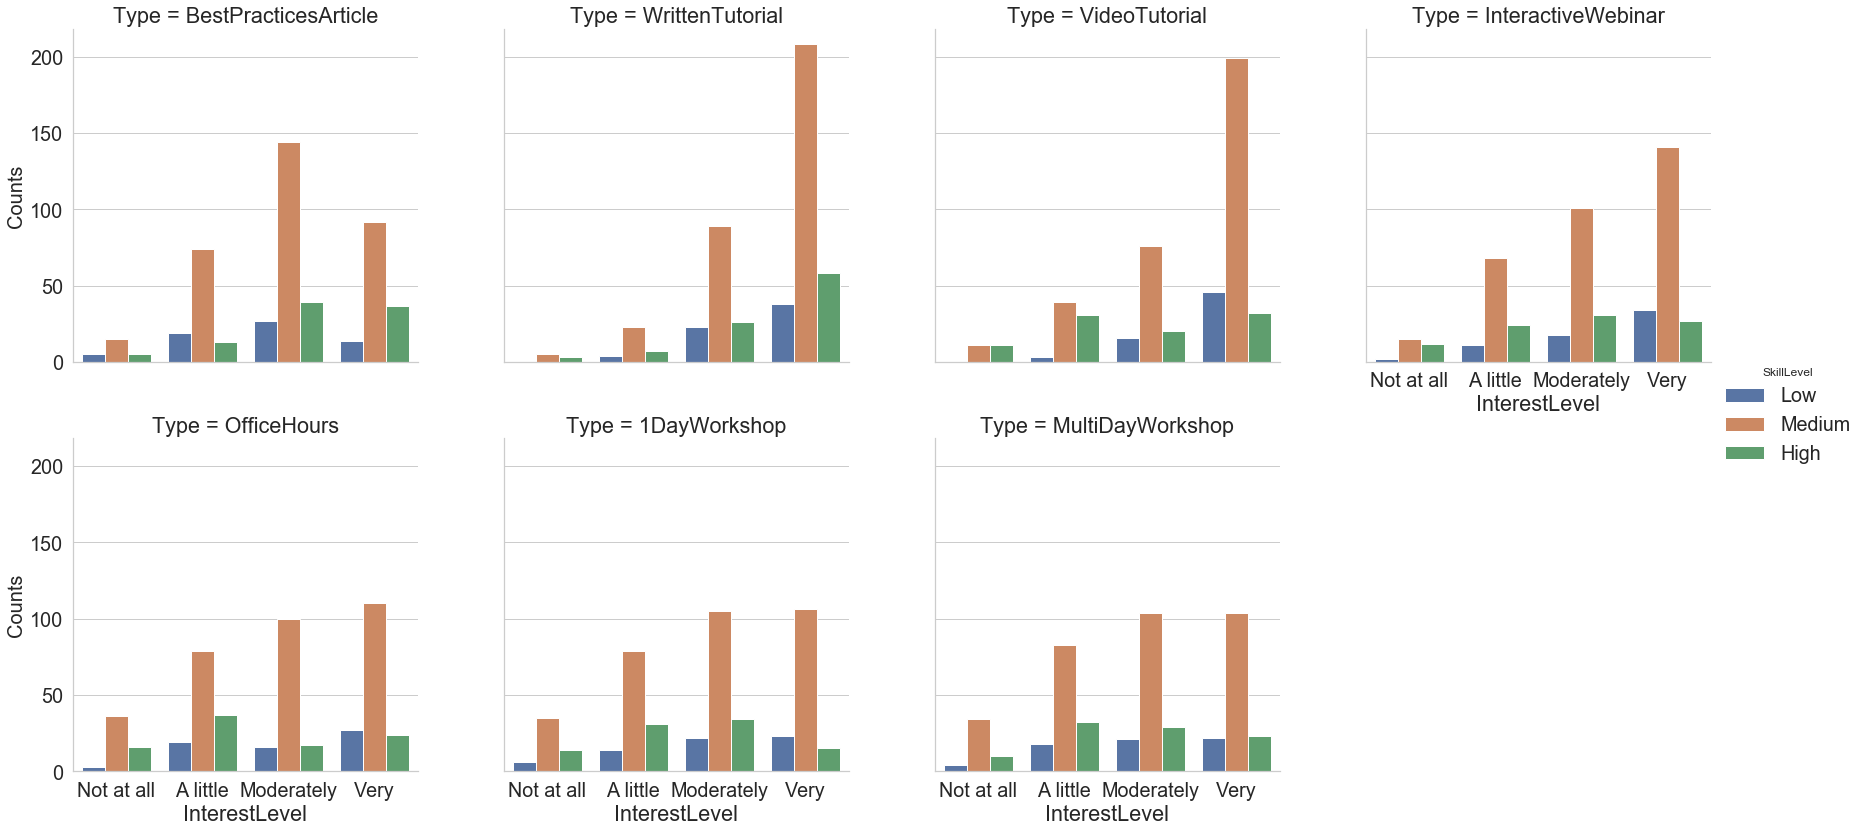

In [121]:
df['LowSkills'] = df.eval("`How would you rate your computational skills?` < 3")
df['MedSkills'] = df.eval("`How would you rate your computational skills?` in [3,4,5]")
df['HighSkills'] = df.eval("`How would you rate your computational skills?` > 5")

df['SkillLevel'] = [0]*df.shape[0]
df.loc[df['LowSkills'] == True, 'SkillLevel'] = 'Low'
df.loc[df['MedSkills'] == True, 'SkillLevel'] = 'Medium'
df.loc[df['HighSkills'] == True, 'SkillLevel'] = 'High'

columns = list(df.columns)
interest_form = [x for x in columns if "For any topic(s) you're interested in, how interested would you be in learning about them in the following ways? " in x]
melted = df.melt(id_vars=['SkillLevel'], value_vars=interest_form,
        var_name='TypeOfInterest', value_name='InterestLevel')
melted['Type'] = melted['TypeOfInterest'].replace({interest_form[0]: 'BestPracticesArticle',
                                                   interest_form[1]: 'WrittenTutorial',
                                                   interest_form[2]: 'VideoTutorial',
                                                   interest_form[3]: 'InteractiveWebinar',
                                                   interest_form[4]: 'OfficeHours',
                                                   interest_form[5]: '1DayWorkshop',
                                                   interest_form[6]: 'MultiDayWorkshop'})

sns.set(font_scale=1.8)
sns.set_style("whitegrid")
g = sns.catplot(data=melted,kind='count',col='Type',col_wrap=4,
                x='InterestLevel',
                order=['Not at all interested','A little interested','Moderately interested','Very interested'],
                hue='SkillLevel',hue_order=['Low','Medium','High'],height=6)
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])
g.set_ylabels("Counts", fontsize = 20)
plt.savefig("InterestLearning_CompSkill.png",bbox_inches='tight',dpi=300)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


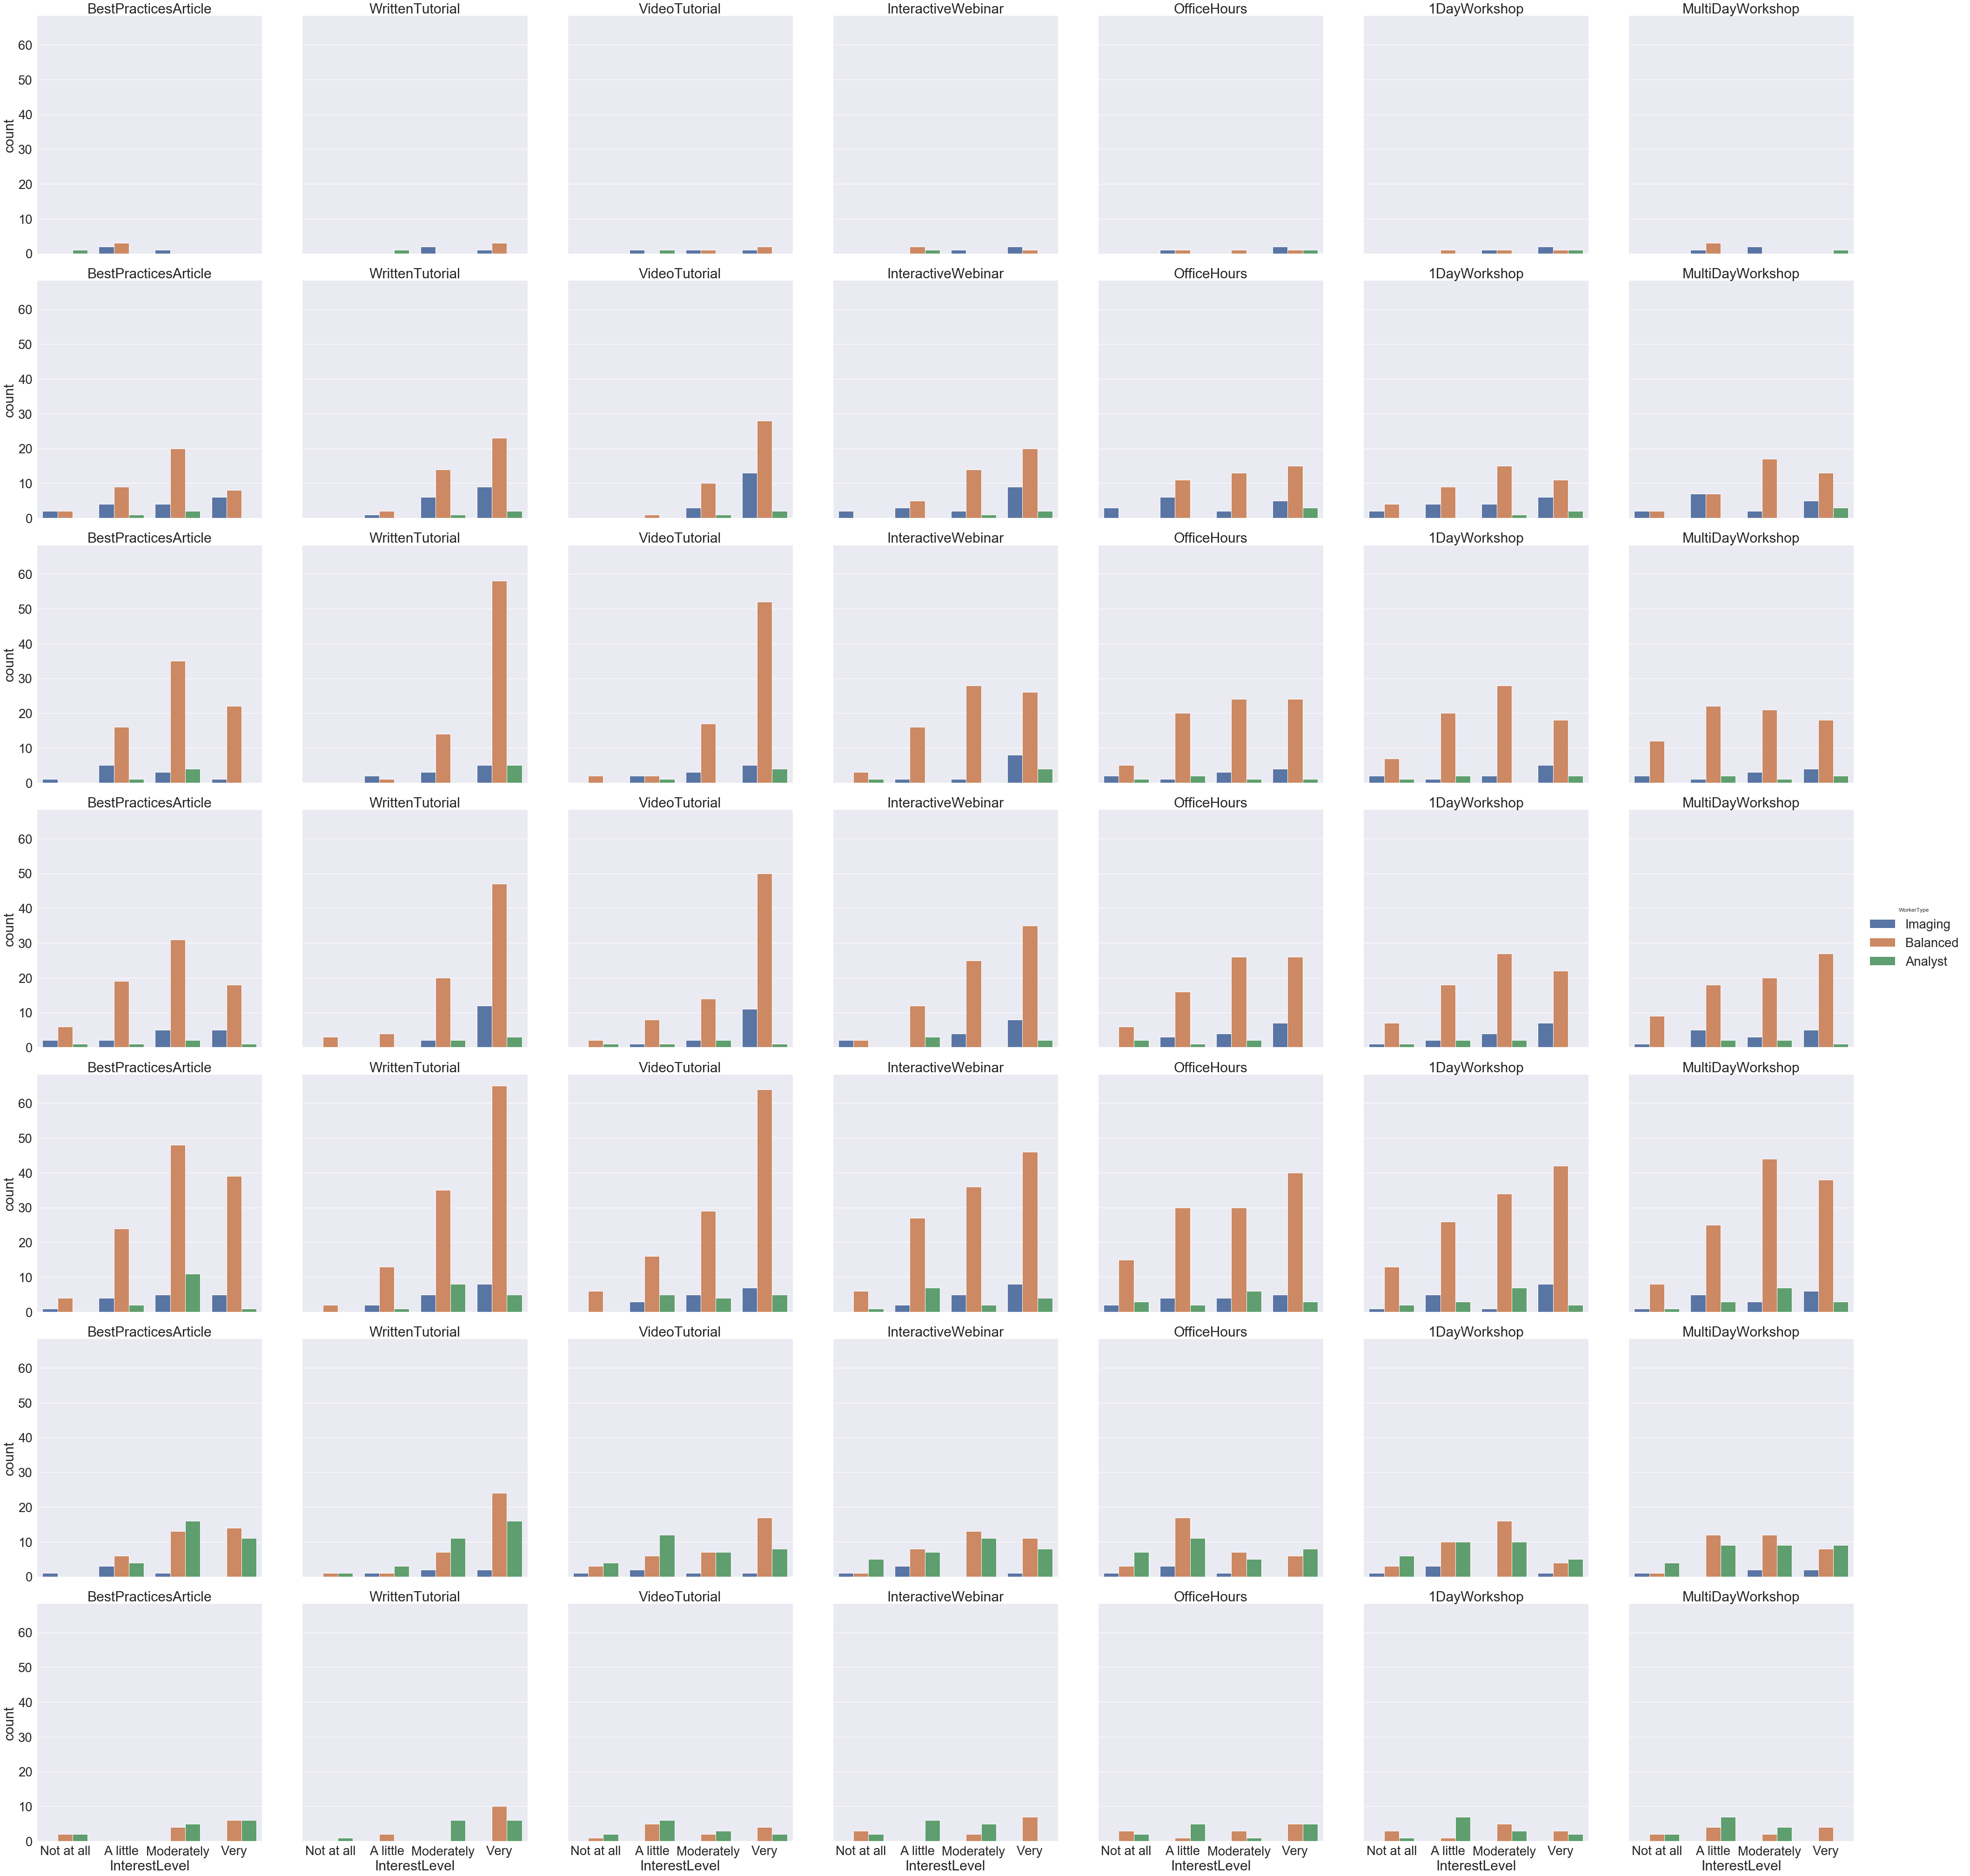

In [64]:
sns.set(font_scale=2.5)
g = sns.catplot(data=melted,kind='count',col='Type',row='How would you rate your computational skills?',
                x='InterestLevel',
                order=['Not at all interested','A little interested','Moderately interested','Very interested'],
                hue='WorkerType',hue_order=['Imaging','Balanced','Analyst'],height=8)
g.set_xticklabels(["Not at all", "A little", "Moderately","Very"])
g.set_titles("{col_name}")